In [1]:
import numpy as np

from pyquil.paulis import PauliTerm, PauliSum, exponentiate, exponential_map
from pyquil.api import WavefunctionSimulator

from pyquil import Program
from pyquil.gates import H, X, Y, Z, I, RX, RY, RZ
from pyquil.api import QVMConnection

# Plotting
import matplotlib
from matplotlib.ticker import MultipleLocator
from matplotlib import rcParams
import matplotlib.pyplot as plt
rcParams["font.family"] = "serif"
rcParams["font.serif"] = "Times New Roman"
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = [r'\usepackage{amsmath} \usepackage{bm}']

# Magic commands
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # For high quality figures
%load_ext autoreload
%autoreload 2

In [120]:
#qvm = QVMConnection()

In [12]:
pauli_x = PauliTerm('X', 0)
pauli_y = PauliTerm('Y', 1)
pauli_z = PauliTerm('Z', 2)
pauli_sum = PauliSum((pauli_x, pauli_y, pauli_z))

pauli_sum_0 = PauliSum((PauliTerm('Z', 0), PauliTerm('Y', 1), PauliTerm('X', 2)))

In [128]:
p = Program()
r1 = p.declare('r1', 'BIT', 3)

p += X(0)#RZ(np.pi/2, 0)
p += I(1)
p += X(2)
p.measure_all()

In [77]:
#sim = WavefunctionSimulator()

In [78]:
#wavefunction = sim.wavefunction(p)

In [79]:
print(wavefunction)

(1+0j)|101>


In [84]:
sum_ = PauliSum([pauli_x, pauli_y, pauli_z])

In [115]:
exp_prog = exponential_map(pauli_x)

In [108]:
exp_prog(0).measure_all()

In [116]:
qvm.run(exp_prog(0).measure_all())

[[0]]

In [130]:
sim.expectation(qvm.run(p), pauli_sum)

TypeError: prep_prog variable must be a Quil program object

In [129]:
qvm.run(p)

[[1, 0, 1]]

In [136]:
f = 10
g = f
h = g
g += 1
print(f)
print(g)
print(h)

10
11
10


In [137]:
5 * pauli_sum

# VQE Testing

In [27]:
from vqe_template import *
from pyquil.unitary_tools import lifted_pauli
from numpy.linalg import eigvals

In [28]:
from pyquil.paulis import sX, sZ, sI

H = 0.2*sX(2)*sZ(1)*sX(0) + 0.9*sX(2)*sI(1)*sX(0) + 0.3*sZ(2)*sZ(1)*sZ(0)
H_tensor = lifted_pauli(H, H.get_qubits())

[0, 1, 2]

In [32]:
eigvals(H_tensor)

array([ 1.4+0.j, -0.8+0.j,  0.4+0.j, -1. +0.j,  0.8+0.j, -1.4+0.j,
        1. +0.j, -0.4+0.j])

In [30]:
print(solve_vqe(H))

(array([ 0.33054066, -0.06618822,  1.69897614, -0.15355158, -0.05177877,
        1.2054446 , -0.22609197, -0.34531583,  0.46606941,  0.34066268,
       -3.42113405, -0.99116697,  0.83697985,  0.03419144, -0.03476776]), -1.1874458956734633)


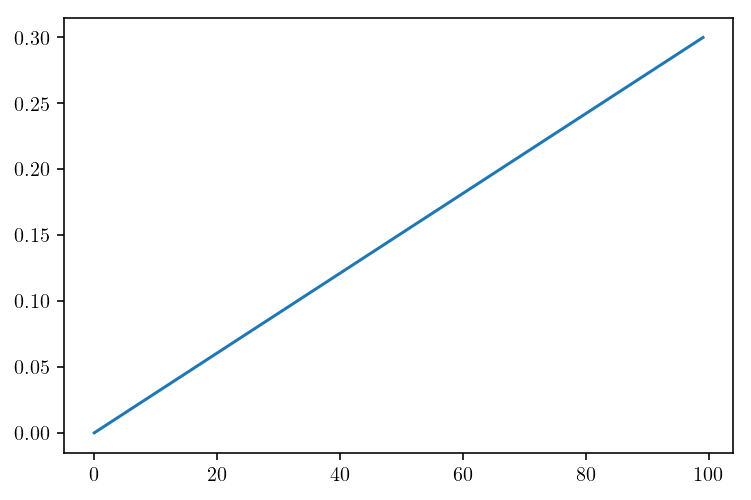

In [10]:
plt.plot(t, lambda_arr)
plt.show()

In [41]:
c = np.array([[1,2,3],[3,4,5]])
c.shape

(2, 3)

In [42]:
print(np.reshape(np.asarray(c.flat), (2,3)))

[[1 2 3]
 [3 4 5]]
